In [ ]:
import numpy as np
import pandas as pd
import time
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix
import math
from scipy.stats import entropy

Load the Datasets

In [ ]:
df_unusual = pd.read_csv('delay_unusual_traffic.csv')
df = pd.read_csv('normal-few_anomalies.csv')

# Drop rows with NaN in the 'Source' column
df.dropna(subset=['Source'], inplace=True)
df.dropna(subset=['Payload Length'], inplace=True)

# #Fix Length column
# Length=df['Length'].values
# df.drop('Length', axis=1, inplace=True)

# for i in range(len(Length)):
#     ind=Length[i].find(',')
#     if(ind!=-1):
#         Length[i]=Length[i].split(",",1)[1]

# #Add back Length column
# df['Length'] = Length.tolist()

# df['Length'] = df['Length'].astype(int)

# Sort the DataFrame by 'Time'
df.sort_values(by='Time', inplace=True)

# Convert 'Time' column to datetime for calculations
df['Time'] = pd.to_datetime(df['Time'], unit='s')

# Calculate the inter-arrival time per source IP address
df['Inter-Arrival Time'] = df.groupby('Source')['Time'].diff()

df['Inter-Arrival Time (s)'] = df['Inter-Arrival Time'].dt.total_seconds()

# Drop rows with NaN in the 'Source' column
df.dropna(subset=['Inter-Arrival Time (s)'], inplace=True)

# Calculate entropy of payload sizes
payload_entropy = df.groupby('Source')['Payload Length'].apply(lambda x: entropy(np.bincount(x)))
df['Payload_Entropy'] = payload_entropy.reindex(df['Source']).values


In [ ]:
# Drop rows with NaN in the 'Source' column
df_unusual.dropna(subset=['Source'], inplace=True)
df_unusual.dropna(subset=['Payload Length'], inplace=True)

# Sort the DataFrame by 'Time'
df_unusual.sort_values(by='Time', inplace=True)

# Convert 'Time' column to datetime for calculations
df_unusual['Time'] = pd.to_datetime(df_unusual['Time'], unit='s')

# Calculate the inter-arrival time per source IP address
df_unusual['Inter-Arrival Time'] = df_unusual.groupby('Source')['Time'].diff()

df_unusual['Inter-Arrival Time (s)'] = df_unusual['Inter-Arrival Time'].dt.total_seconds()

# Drop rows with NaN in the 'Source' column
df_unusual.dropna(subset=['Inter-Arrival Time (s)'], inplace=True)

# Calculate entropy of payload sizes
payload_entropy = df_unusual.groupby('Source')['Payload Length'].apply(lambda x: entropy(np.bincount(x)))
df_unusual['Payload_Entropy'] = payload_entropy.reindex(df_unusual['Source']).values

In [ ]:
df_unusual['Delay'] = (df_unusual['Inter-Arrival Time (s)'] > 6).astype(int)
df_unusual['Unusual'] = (df_unusual['Payload Length'] > 150).astype(int)
df_unusual['Anomaly'] = (df_unusual['Delay'] | df_unusual['Unusual']).astype(int)
df['Delay'] = (df['Inter-Arrival Time (s)'] > 6).astype(int)
df['Unusual'] = (df['Payload Length'] > 150).astype(int)
df['Anomaly'] = (df['Delay'] | df['Unusual']).astype(int)

In [ ]:
# Preprocess the data
labels=df_unusual['Anomaly']
df_unusual.drop('Anomaly', axis=1, inplace=True)
df_unusual.drop('Delay', axis=1, inplace=True)
df_unusual.drop('Unusual', axis=1, inplace=True)        # might help improve the models performance
df_unusual.drop('Time', axis=1, inplace=True)
df_unusual.drop('Source', axis=1, inplace=True)
df_unusual.drop('Destination', axis=1, inplace=True)
df_unusual.drop('Protocol', axis=1, inplace=True)
df_unusual.drop('Info', axis=1, inplace=True)
df_unusual.drop('Inter-Arrival Time', axis=1, inplace=True)
df_unusual.drop('No.', axis=1, inplace=True)
df_unusual.drop('Sequence Number', axis=1, inplace=True)

labels_train=df['Anomaly']
df.drop('Anomaly', axis=1, inplace=True)
df.drop('Delay', axis=1, inplace=True)
df.drop('Unusual', axis=1, inplace=True)        # might help improve the models performance
df.drop('Time', axis=1, inplace=True)
df.drop('Source', axis=1, inplace=True)
df.drop('Destination', axis=1, inplace=True)
df.drop('Protocol', axis=1, inplace=True)
df.drop('Info', axis=1, inplace=True)
df.drop('Inter-Arrival Time', axis=1, inplace=True)
df.drop('No.', axis=1, inplace=True)
df.drop('Sequence Number', axis=1, inplace=True)

# Calculate Payload-Inter-Arrival Time Ratio by dividing 'Payload Length' with 'Inter-Arrival Time (s)'
df['Payload-Inter-Arrival Time Ratio'] = df['Payload Length']/df['Inter-Arrival Time (s)']
df_unusual['Payload-Inter-Arrival Time Ratio'] = df_unusual['Payload Length']/df_unusual['Inter-Arrival Time (s)']

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(df, labels, test_size=0.2, random_state=42)

In [ ]:
anomaly = np.count_nonzero(labels_train == 1)
outliers_fraction = anomaly/len(labels_train)
print(f'Anomaly Percenatge: {outliers_fraction*100}%')

print(df)
print(df_unusual)

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
# Fit the scaler on the data and transform it
scaled_data = scaler.fit_transform(df)

# Convert scaled data back to a DataFrame
df = pd.DataFrame(scaled_data, columns=df.columns)

scaler = MinMaxScaler()
# Fit the scaler on the data and transform it
scaled_data = scaler.fit_transform(df_unusual)

# Convert scaled data back to a DataFrame
df_unusual = pd.DataFrame(scaled_data, columns=df_unusual.columns)

Anomaly Percenatge: 30.866141732283463%
       Payload Length  Inter-Arrival Time (s)  Payload_Entropy  \
8                76.0                   0.494         0.000000   
16               76.0                   0.743         0.000000   
18               76.0                   0.752         0.000000   
30               76.0                   1.066         0.000000   
34               76.0                   1.818         0.000000   
...               ...                     ...              ...   
19769            25.0                   6.015         0.767858   
19771            25.0                   0.186         1.188098   
19773            25.0                   6.005         0.757434   
19775            25.0                   1.241         0.828518   
19777            25.0                   6.011         0.766694   

       Payload-Inter-Arrival Time Ratio  
8                            153.846154  
16                           102.288022  
18                           101.063830  

In [ ]:
# Define the anomaly detection models
iso = IsolationForest(random_state = 0, contamination=0.1)
ocsvm = OneClassSVM(nu=outliers_fraction, kernel="rbf", gamma=0.1)

# Train the models and measure the training time
start=time.time()
ocsvm.fit(df)
ocsvm_time = time.time() - start

start=time.time()
iso.fit(df)
iso_time = time.time() - start

# Predictions
ocsvm_prediction = ocsvm.predict(df_unusual)
print("OneClassSVM Prediction:",ocsvm_prediction)

iso_prediction = iso.predict(df_unusual)
print("Isolation Forest Prediction:",iso_prediction)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


OneClassSVM Prediction: [-1 -1 -1 ... -1 -1 -1]
Isolation Forest Prediction: [-1 -1  1 ... -1  1 -1]


In [ ]:
normal_test = np.count_nonzero(labels == 0)
anomaly_test = np.count_nonzero(labels == 1)
print(f'Normal_test: {normal_test}')
print(f'Anomaly_test: {anomaly_test}')

Normal_test: 1535
Anomaly_test: 2051


In [ ]:
print(f'Anomaly captured by OneClassSVM: {np.count_nonzero(ocsvm_prediction == -1)}')
print(f'Anomaly captured by IsolationForest: {np.count_nonzero(iso_prediction == -1)}')

Anomaly captured by OneClassSVM: 3586
Anomaly captured by IsolationForest: 2129


In [ ]:
ocsvm_incorrect = sum((labels == 0) & (ocsvm_prediction == -1))     # False positives
iso_incorrect = sum((labels == 0) & (iso_prediction == -1))         # False positives
print(f'Incorrectly classified as anomaly by OneClassSVM: {ocsvm_incorrect}')
print(f'Incorrectly classified as anomaly by IsolationForest: {iso_incorrect}')

Incorrectly classified as anomaly by OneClassSVM: 1535
Incorrectly classified as anomaly by IsolationForest: 110


In [ ]:
ocsvm_correct = sum((labels == 1) & (ocsvm_prediction == -1)) * 100      # True positives
iso_correct = sum((labels == 1) & (iso_prediction == -1)) * 100           # True positives
print(f'Correctly classified as anomaly by OneClassSVM (%): {ocsvm_correct/anomaly_test}%')
print(f'Correctly classified as anomaly by IsolationForest (%): {iso_correct/anomaly_test}%')

Correctly classified as anomaly by OneClassSVM (%): 100.0%
Correctly classified as anomaly by IsolationForest (%): 98.43978547050219%


In [ ]:
mse_ocsvm = mean_squared_error(labels,ocsvm_prediction)
mse_iso = mean_squared_error(labels,iso_prediction)
print(mse_ocsvm)
print(mse_iso)

2.715839375348578
2.680145008365867


In [ ]:
# ocsvm_prediction_mapped = np.where(ocsvm_prediction == -1, 1, 0)
ocsvm_prediction_mapped = [0 if pred == 1 else 1 for pred in ocsvm_prediction]
conf_matrix_ocsvm = confusion_matrix(labels, ocsvm_prediction_mapped)
print(conf_matrix_ocsvm)
# iso_prediction_mapped = np.where(iso_prediction == -1, 1, 0)
iso_prediction_mapped = [0 if pred == 1 else 1 for pred in iso_prediction]
conf_matrix_iso = confusion_matrix(labels, iso_prediction_mapped)
print(conf_matrix_iso)

[[   0 1535]
 [   0 2051]]
[[1425  110]
 [  32 2019]]


0.9563683084600028


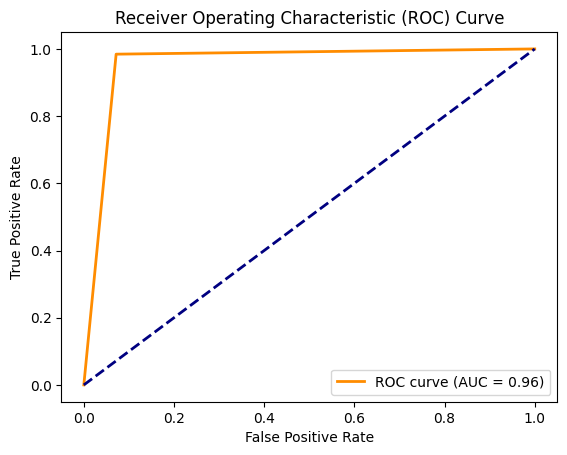

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming 'y_true' contains true labels (0 for normal, 1 for anomalies) and 'predictions' contains model predictions (-1 for anomalies)
fpr, tpr, thresholds = roc_curve(labels, iso_prediction_mapped, pos_label=1)
roc_auc = auc(fpr, tpr)
print(roc_auc)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

0.5


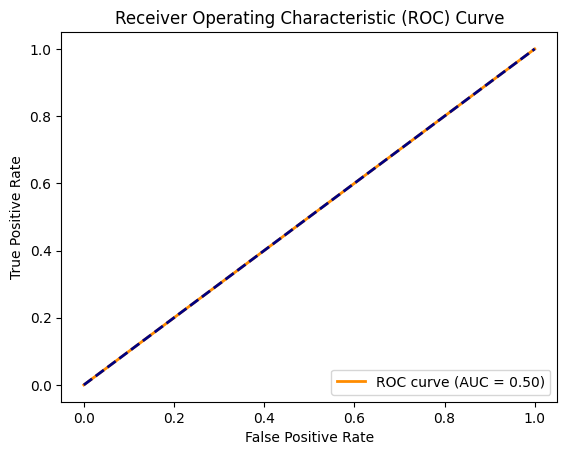

In [ ]:
# Assuming 'y_true' contains true labels (0 for normal, 1 for anomalies) and 'predictions' contains model predictions (-1 for anomalies)
fpr, tpr, thresholds = roc_curve(labels, ocsvm_prediction_mapped, pos_label=1)
roc_auc = auc(fpr, tpr)
print(roc_auc)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
print(f'Training time OneClassSVM: {ocsvm_time}')
print(f'Training time IsolationForest: {iso_time}')

Training time OneClassSVM: 3.1887176036834717
Training time IsolationForest: 0.7446479797363281
